In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

## Creating a standard simple linear regression model

In [4]:
# read in data
data = pd.read_csv('mammals.csv')

In [5]:
# select feature and target
mammals = data[['body_wt','brain_wt']]

In [6]:
X = np.array(data['body_wt']).reshape(-1,1)
y = np.array(data['brain_wt']).reshape(-1,1)

In [7]:
# initialize LinReg object
regr = LinearRegression()

# fit model 
regr.fit(X, y)

# predict
y_pred = regr.predict(X)

# create residuals
residuals = y - y_pred

### Comparing predictions to actual outputs before transforming variables

In [8]:
y_pred_series = pd.Series(y_pred[:,0])
y_test_series = pd.Series(y[:,0])
z = pd.concat([y_test_series, y_pred_series], axis=1)
z.columns = ['True', 'Prediction']
z

,True,Prediction
0,5712.0,6522.071227
1,6.6,91.970893
2,44.5,94.275986
3,5.7,91.893573
4,4603.0,2552.670645
...,...,...
57,12.3,92.937389
58,2.5,91.104912
59,58.0,95.054016
60,3.9,94.387133


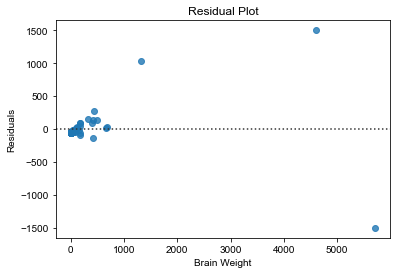

In [10]:
# create residual plot
res_plot = sns.residplot(x=y,y=residuals)
res_plot.set_title('Residual Plot')
res_plot.set_xlabel('Brain Weight')
res_plot.set_ylabel('Residuals')
sns.set(rc={"figure.figsize":(12, 12)})

Text(0.5, 0, 'Binned Residuals')

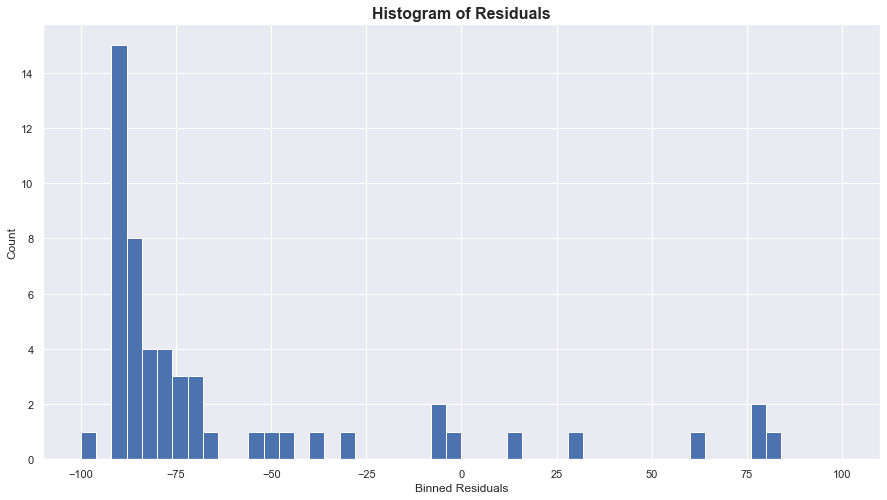

In [11]:
# create historgram of residuals
plt.figure(figsize=(15,8))
plt.hist(residuals, bins=50, range=(-100,100))
plt.title('Histogram of Residuals', fontsize=16, weight='bold')
plt.ylabel('Count')
plt.xlabel('Binned Residuals')

# Creating a transformed linear regression model

In [12]:
#log transform inputs and target
log_X,log_y = np.log(X), np.log(y)

In [13]:
regr.fit(log_X,log_y)
log_y_pred = regr.predict(log_X) 

In [14]:
log_residuals = log_y - log_y_pred

## Comparing predictions to actual outputs after transformation

In [15]:
y_pred_series = pd.Series(log_y_pred[:,0])
y_test_series = pd.Series(log_y[:,0])
z = pd.concat([y_test_series, y_pred_series], axis=1)
z.columns = ['True', 'Prediction']
z

,True,Prediction
0,8.650325,8.751860
1,1.887070,2.134789
2,3.795489,3.051360
3,1.740466,2.072112
4,8.434464,8.030015
...,...,...
57,2.509599,2.655818
58,0.916291,0.433450
59,4.060443,3.211730
60,1.360977,3.076473


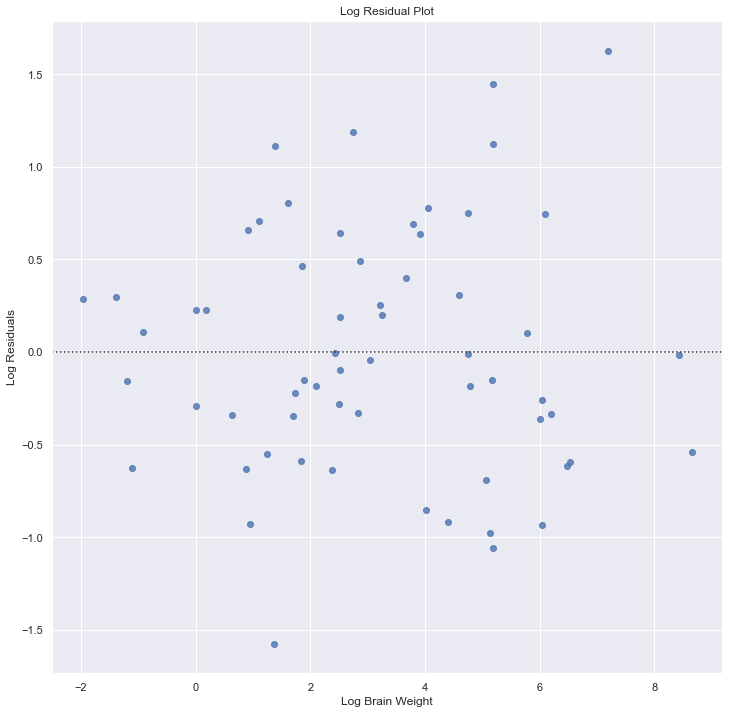

In [61]:
# chart of residuals after log transformation
res_plot = sns.residplot(x=log_y,y=log_residuals)
res_plot.set_title('Log Residual Plot')
res_plot.set_xlabel('Log Brain Weight')
res_plot.set_ylabel('Log Residuals')
sns.set(rc={"figure.figsize":(12, 12)})

Text(0.5, 0, 'Binned Residuals')

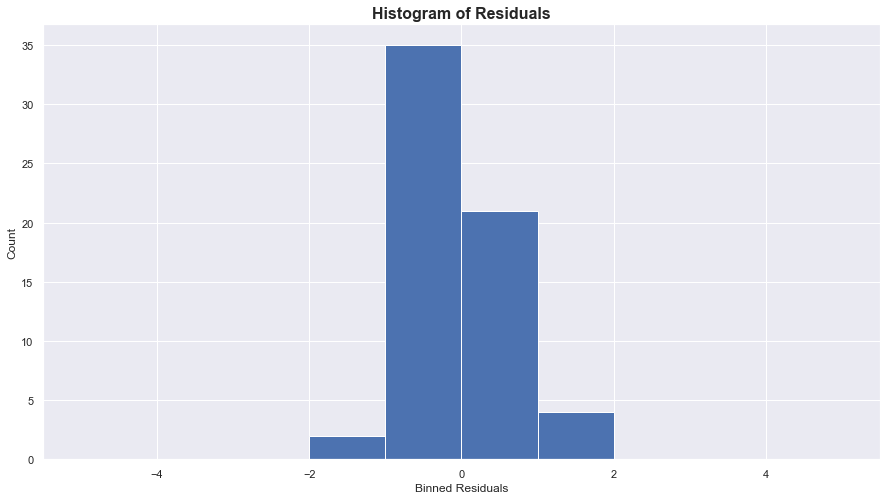

In [62]:
# distribution of log residuals
plt.figure(figsize=(15,8))
plt.hist(log_residuals, bins=10, range=(-5,5))
plt.title('Histogram of Residuals', fontsize=16, weight='bold')
plt.ylabel('Count')
plt.xlabel('Binned Residuals')

## Visualizing the predictions against actual values

Text(0, 0.5, 'Log of human brain weights')

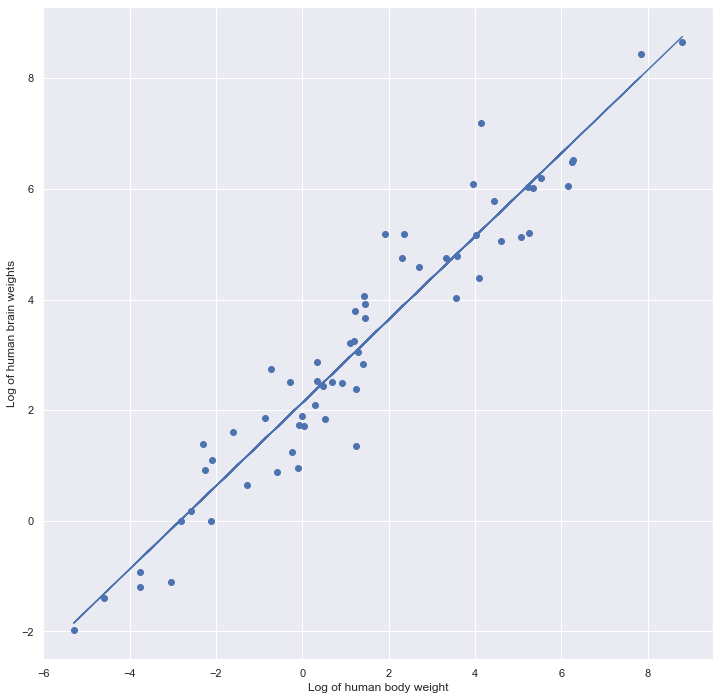

In [17]:
plt.scatter(log_X, log_y)
plt.plot(log_X, log_y_pred)
plt.xlabel('Log of human body weight')
plt.ylabel('Log of human brain weights')

In [18]:
## slope of log regression line
regr.coef_[0][0]

0.7516859362419008

# Challenge

In [19]:
log_62 = np.log(62).reshape(1,-1)
print("The log value of an average body size of 62 is:", log_62[0][0])
pred = regr.predict(log_62)
print("The predicted log value of the average size of a mammal brain with average body size log(62) is:", pred[0][0])
print("The median predicted brain size of mammals is:", np.exp(pred[0][0]))

The log value of an average body size of 62 is: 4.127134385045092
The predicted log value of the average size of a mammal brain with average body size log(62) is: 5.237097550983396
The median predicted brain size of mammals is: 188.12329098248597


In [20]:
# calculate SSE
sse = np.sum(log_residuals**2)
# calculate MSE
mse = sse / len(log_residuals)
print("Unbiased estimator of variance:", mse)
# translate average log(Brain) estimate to the average estimate on original scale
avg_est = np.exp(pred[0][0]+mse/2)
print("Predicated average mammal brain size:",avg_est)

Unbiased estimator of variance: 0.4664953293783974
Predicated average mammal brain size: 237.54218189247754
